<img src="kmeans_thumb.jpg" width=70%>

# K-Means Clustering 

1. Word embeddings

In [2]:
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings("ignore")

In [3]:
pairs = ['add user','delete user','modify user','create user',
         'access granted','access revoked','access profile',
         'disk space','disk full', 'disk malfunction']

In [5]:
#phrase_model = SentenceTransformer('whaleloops/phrase-bert')
phrase_model = SentenceTransformer("all-mpnet-base-v2")

In [6]:
embeds = phrase_model.encode(pairs)

In [7]:
embeds.shape

(10, 768)

2. Do dimensionality reduction and visualize embeddings

In [8]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
x_embeds = embeds.copy()
X_transformed = pca.fit_transform(embeds)

In [12]:
import numpy as np
centroids = np.random.random((3,2))

In [10]:
scale = 3
centroids = centroids * np.array([[1,scale],[1,scale],[1,scale]])

In [13]:
centroid_dict = {}
for i in range(3):
    centroid_dict[i] = centroids[i,:]
centroid_dict

{0: array([0.97585163, 0.56670084]),
 1: array([0.89579711, 0.66386966]),
 2: array([0.85630817, 0.2360203 ])}

In [15]:
centroid_dict = {
    0: np.array([0, 0.4]),
    1: np.array([-0.2, 0.0]),
    2: np.array([0.4, -0.1]),
}

3. Visualize low dim embeddings

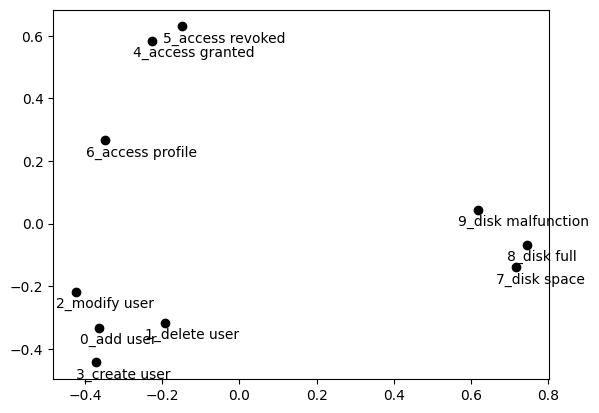

In [16]:
import matplotlib.pyplot as plt
#cent_color = ['red','green','blue']
#for key in centroid_dict.keys():
#    plt.scatter(centroid_dict[key][0],
#                centroid_dict[key][1],
#                color=cent_color[key],marker='x',s=40)
for ind in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[ind,0],
                X_transformed[ind,1],
                marker='o',color='black')
    plt.text(X_transformed[ind,0]-0.05,
                X_transformed[ind,1]-0.05,
                str(ind)+'_'+pairs[ind])

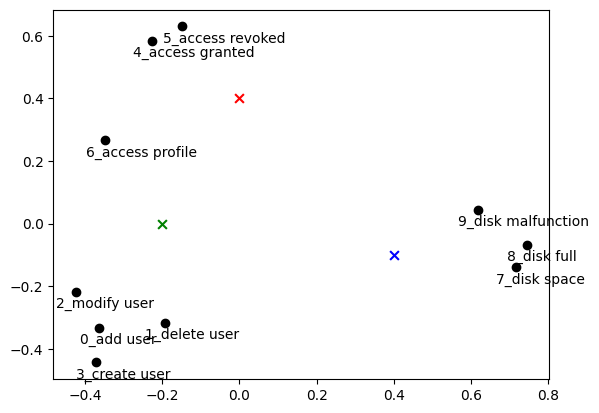

In [17]:
import matplotlib.pyplot as plt
cent_color = ['red','green','blue']
for key in centroid_dict.keys():
    plt.scatter(centroid_dict[key][0],
                centroid_dict[key][1],
                color=cent_color[key],marker='x',s=40)
for ind in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[ind,0],
                X_transformed[ind,1],
                marker='o',color='black')
    plt.text(X_transformed[ind,0]-0.05,
                X_transformed[ind,1]-0.05,
                str(ind)+'_'+pairs[ind])

4. K-means Clustering

In [18]:
import scipy
centroids_in_time = {}
clusters_in_time = {}

centroids_in_time[-1] = centroid_dict.copy() 
centroid_in_time = {0:[],1:[],2:[]}

for cent_key in centroid_in_time.keys():
    centroid_in_time[cent_key].append(centroid_dict[cent_key].copy())

centroid_difference_in_time = {}
for i in range(3):
    centroid_difference_in_time[i] = []

In [20]:
iters = 5
for iter_num in range(iters):
    print(f"------------ Iteration {iter_num} -------------")

    #print(">>>>>> Step 1: Assign Data Point to Clusters")
    #Step 1: cluster assigment step
    cluster_dict = {}
    for j,data_point in enumerate(X_transformed):
        #print(j,' ------ data_point',data_point)
        cent_dist = np.array([])
        for center in centroid_dict.keys():
            #print('centroid',center,centroid_dict[key])
            dist = scipy.spatial.distance.euclidean(data_point,centroid_dict[center])
            cent_dist = np.append(cent_dist,dist)
        cent_dist =  np.sqrt(cent_dist)
        #print(cent_dist)
        cluster_index = np.argmin(cent_dist)
        #print('Cluster index',cluster_index)
        if cluster_index in cluster_dict:
            cluster_dict[cluster_index].append(j)
        else:
            cluster_dict[cluster_index] = [j]
            
    clusters_in_time[iter_num] = cluster_dict.copy()

    #print(">>>>>> Step 2: Update centroids")
    #Step 2: centroid update step
    stop_check_array = []
    for cluster_key in cluster_dict:
        #print()
        cluster_items = cluster_dict[cluster_key]
        cluster_items = np.array(cluster_items).astype(int)
        
        new_centroid = X_transformed[cluster_items].mean(axis=0)

        centroid_in_time[cluster_key].append(new_centroid.copy())

        distance_between_old_new_centroid = scipy.spatial.distance.euclidean(new_centroid,centroid_dict[cluster_key])
        stop_check_array.append(distance_between_old_new_centroid)

        #print(f"old centroid {cluster_key}: {centroid_dict[cluster_key]} new centroid {cluster_key}: {new_centroid}")
        centroid_dict[cluster_key] = new_centroid.copy()
        centroids_in_time[iter_num] = centroid_dict.copy()   

    for time_key in centroid_difference_in_time:
        centroid_difference_in_time[time_key] += [stop_check_array[time_key]]

    stop_check_array = np.sqrt(stop_check_array)
    #print(stop_check_array)

    #is_stop = True
    #for diff in stop_check_array:
    #    if diff > 0.001:
    #        is_stop = False
    #        break

    #if is_stop:
    #    print(f'>>>>> Training stopped @ iteration {iter_num}')
    #    iters = iter_num
    #    break

------------ Iteration 0 -------------
------------ Iteration 1 -------------
------------ Iteration 2 -------------
------------ Iteration 3 -------------
------------ Iteration 4 -------------


In [21]:
cluster_dict

{1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]}

In [22]:
centroid_in_time

{0: [array([0. , 0.4]),
  array([-0.1870865,  0.6065102], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32),
  array([-0.24103689,  0.49295354], dtype=float32)],
 1: [array([-0.2,  0. ]),
  array([-0.34062272, -0.20981152], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.33854398, -0.32872444], dtype=float32),
  array([-0.338

In [23]:
centroids_in_time[-1]

{0: array([0. , 0.4]), 1: array([-0.2,  0. ]), 2: array([ 0.4, -0.1])}

In [24]:
centroid_difference_in_time.keys()

dict_keys([0, 1, 2])

In [25]:
stop_check_array

array([0., 0., 0.])

In [26]:
clusters_in_time

{0: {1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]},
 1: {1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]},
 2: {1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]},
 3: {1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]},
 4: {1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]}}

In [27]:
import random
r = lambda: random.randint(0,255)

def random_color():
    return '#%02X%02X%02X'%(r(),r(),r())

In [28]:
import matplotlib.pyplot as plt

iter_color = ['red','green','blue','cyan']
iter_color = []
for iter_num in range(-1,iters):
    iter_color.append(random_color())
 

In [29]:
iter_color

['#6D738E', '#40E146', '#C516E0', '#84D6C8', '#38FF94', '#474919']

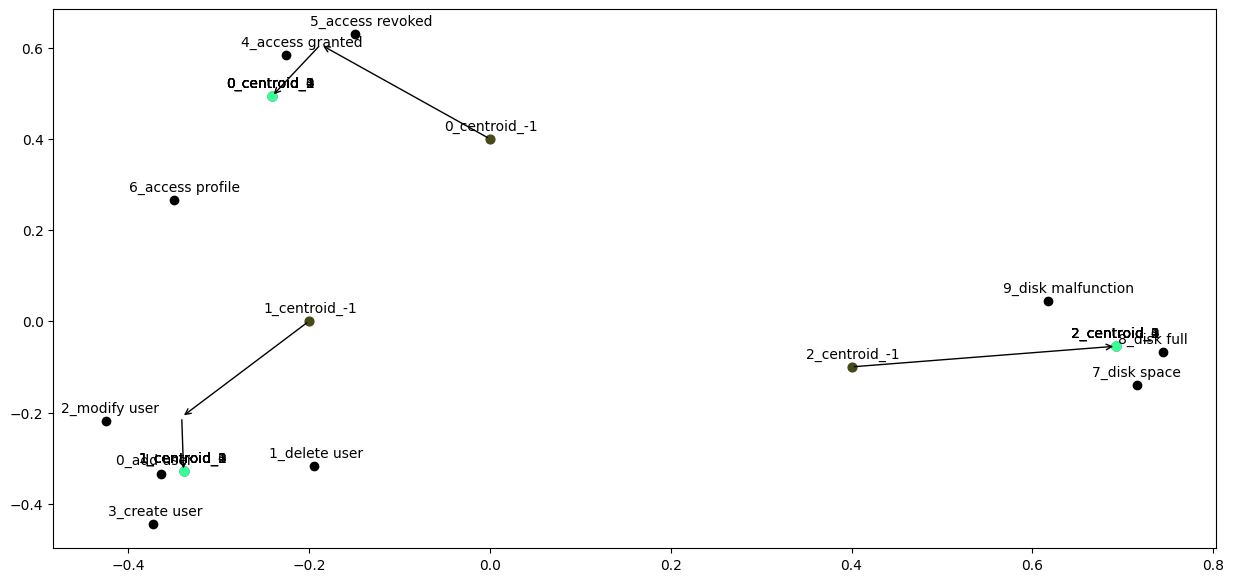

In [32]:
plt.figure(figsize=(15,7))
for iter_num in range(-1,iters):
    #print('Iter num',iter_num)
    centroid_dict = centroids_in_time[iter_num]
    for j in centroid_dict.keys():
        plt.scatter(centroid_dict[j][0],centroid_dict[j][1],color=iter_color[iter_num],marker='o',s=40)
        plt.text(centroid_dict[j][0]-0.05,centroid_dict[j][1]+0.02,str(j)+'_centroid_'+str(iter_num))

for key in centroid_in_time:
    centroid_list = centroid_in_time[key]
    #print(len(centroid_list))
    for i in range(len(centroid_list)-1):
        #print(i)
        plt.annotate('',
                     xy=(centroid_list[i+1][0],centroid_list[i+1][1]),
                     xytext=(centroid_list[i][0],centroid_list[i][1]),
                     arrowprops = dict(arrowstyle='->',color='black')
                    )

for i in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[i,0],X_transformed[i,1],marker='o',color="black")
    plt.text(X_transformed[i,0]-0.05,X_transformed[i,1]+0.02, str(i)+"_"+pairs[i])

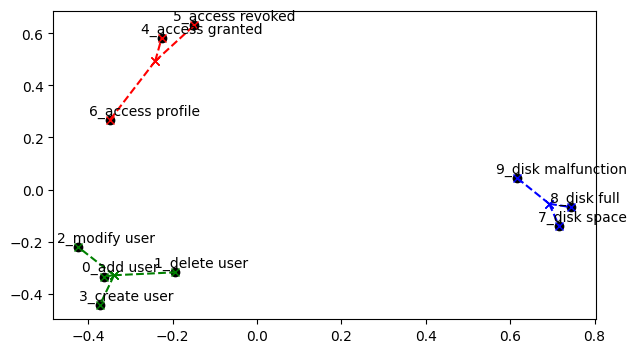

In [37]:
plt.figure(figsize=(7,4))

for i in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[i,0],X_transformed[i,1],marker='o',color="black")
    plt.text(X_transformed[i,0]-0.05,X_transformed[i,1]+0.02, str(i)+"_"+pairs[i])

clust_colors = ['red','green','blue']
for clust_key in cluster_dict.keys():
    cluster_list = cluster_dict[clust_key]
    for item in cluster_list:
        plt.plot([centroid_dict[clust_key][0],X_transformed[item,0]],
                 [centroid_dict[clust_key][1],X_transformed[item,1]],
                 color=clust_colors[clust_key],
                 linestyle='dashed',
                 marker='x')

In [38]:
cluster_dict

{1: [0, 1, 2, 3], 0: [4, 5, 6], 2: [7, 8, 9]}

In [39]:
centroids_in_time.keys()

dict_keys([-1, 0, 1, 2, 3, 4])

In [40]:
centroid_dict

{0: array([-0.24103689,  0.49295354], dtype=float32),
 1: array([-0.33854398, -0.32872444], dtype=float32),
 2: array([ 0.692429  , -0.05465436], dtype=float32)}

In [41]:
centroids_in_time.keys()

dict_keys([-1, 0, 1, 2, 3, 4])